In [114]:
import pandas as pd 
import os
import numpy as np
import math
import pysnooper
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import logging
logging.basicConfig(format='%(asctime)s:%(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

In [125]:
filepath = '0f20c52c24764413a7072e1fd034b2b4.xls'
# for i in os.listdir(filepath):
#     df = pd.read_excel(filepath+i)
#     df.head(5)

a=2

df_ = pd.read_excel(filepath)
df_.columns
# df_new = pd.DataFrame(columns=['last_end_time','last_end_address','now_start_time','now_start_address'])
# df_new.loc[0]=[1,2,3,4]
# df_new.loc[1]=[1,2,3,4]
# df_new

Index(['driving_history_id', 'car_id', 'user_id', 'start_address_name',
       'end_address_name', 'start_time', 'end_time', 'spend_time', 'speed_up',
       'speed_down', 'sharp_turn', 'over_speed', 'avrg_speed', 'mileage',
       'oil', 'fee', 'oil_price', 'create_at', 'start_gps_poi', 'end_gps_poi',
       'datetime', 'weekday'],
      dtype='object')

In [126]:
a,b,c,d = 1,2,3,4
[a,b,c,d]

[1, 2, 3, 4]

In [127]:
#@pysnooper.snoop()
def haversine(lonlat1, lonlat2):
    lon1, lat1  = lonlat1
    lon2, lat2= lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000

In [128]:
df.head()
df.shape
start_gps_pos= df.iloc[0]['start_gps_poi']
a,b = map(float,start_gps_pos.split(','))
#haversine([1.001,2],[1,2.001])
type(b)
haversine([1,2.002],[1,2.001])

111.19492664457833

In [201]:
filepath = 'test1/'
count_time = []
total_num = len(os.listdir(filepath))
INDEX = 1 #记录遍历到第几条，用来输出进度
df_new = pd.DataFrame(columns=['last_end_time','last_end_address','now_start_time','now_start_address','distance'])
df_new_index = 0
sum_loss =0 #统计总丢失条数
sum_all = 0 #统计总记录数
for i in os.listdir(filepath):
    df = pd.read_excel(filepath+i)
    df.head(5)
    
    count = 0 #记录每个人的缺失条数
    
    for i in range(1,df.shape[0]):
        if df['datetime'].iloc[i] != df['datetime'].iloc[i-1]:
            pass
        else:
            start_gps_pos_list = []  #获取开始地址的坐标list  [x,y]
            end_gps_pos_list = []    #获取终止地址的坐标list  [x,y]

            start_gps_pos= df.iloc[i]['start_gps_poi']
            end_gps_pos= df.iloc[i-1]['end_gps_poi']

            a,b = map(float,start_gps_pos.split(','))
            start_gps_pos_list.append(b)
            start_gps_pos_list.append(a)

            a_,b_ = map(float,end_gps_pos.split(','))
            end_gps_pos_list.append(b_)
            end_gps_pos_list.append(a_)

            #计算之间的距离
            distance = haversine(start_gps_pos_list,end_gps_pos_list)
            if distance > 1000:
                count += 1
                #打印出起始到终止地址  的时间以及地址
                #print(df.iloc[i-1]['end_time'],df.iloc[i-1]['end_address_name'],df.iloc[i]['start_time'],df.iloc[i]['start_address_name'],distance)
                
                #统计所有的缺失信息
                df_new.loc[df_new_index] = [df.iloc[i-1]['end_time'],df.iloc[i-1]['end_address_name'],df.iloc[i]['start_time'],df.iloc[i]['start_address_name'],distance]
                df_new_index += 1
                
                #将每一条的起始时间段记录  即i-1次记录的end_time
                hour = int(df.iloc[i-1]['end_time'].split(' ')[1].split(':')[0])
                count_time.append(hour)
    sum_loss += count
    sum_all += df.shape[0]
    logging.info('完成%.2f,缺失条数：%d,记录总条数：%d' % (INDEX/total_num,count,df.shape[0]))
    INDEX += 1
print(sum_loss,sum_all,sum_loss/sum_all)

2019-04-29 11:55:53,992:INFO: 完成0.00,缺失条数：35,记录总条数：843
2019-04-29 11:55:56,242:INFO: 完成0.01,缺失条数：97,记录总条数：2511
2019-04-29 11:55:56,721:INFO: 完成0.01,缺失条数：34,记录总条数：474
2019-04-29 11:55:59,289:INFO: 完成0.01,缺失条数：107,记录总条数：2799
2019-04-29 11:55:59,808:INFO: 完成0.02,缺失条数：66,记录总条数：310
2019-04-29 11:56:01,766:INFO: 完成0.02,缺失条数：86,记录总条数：1806
2019-04-29 11:56:03,792:INFO: 完成0.02,缺失条数：85,记录总条数：1989
2019-04-29 11:56:04,771:INFO: 完成0.03,缺失条数：36,记录总条数：1139
2019-04-29 11:56:06,708:INFO: 完成0.03,缺失条数：141,记录总条数：1357
2019-04-29 11:56:08,766:INFO: 完成0.04,缺失条数：181,记录总条数：1267
2019-04-29 11:56:09,846:INFO: 完成0.04,缺失条数：49,记录总条数：894
2019-04-29 11:56:10,189:INFO: 完成0.04,缺失条数：32,记录总条数：169
2019-04-29 11:56:10,515:INFO: 完成0.05,缺失条数：19,记录总条数：464
2019-04-29 11:56:10,971:INFO: 完成0.05,缺失条数：10,记录总条数：242
2019-04-29 11:56:13,168:INFO: 完成0.05,缺失条数：218,记录总条数：712
2019-04-29 11:56:13,252:INFO: 完成0.06,缺失条数：6,记录总条数：81
2019-04-29 11:56:15,065:INFO: 完成0.06,缺失条数：113,记录总条数：1509
2019-04-29 11:56:15,844:INFO: 完成0.06,缺失条数：36,记录总条数：672

2019-04-29 11:59:55,902:INFO: 完成0.53,缺失条数：64,记录总条数：1246
2019-04-29 12:00:00,732:INFO: 完成0.53,缺失条数：202,记录总条数：3560
2019-04-29 12:00:01,761:INFO: 完成0.53,缺失条数：72,记录总条数：751
2019-04-29 12:00:07,623:INFO: 完成0.54,缺失条数：149,记录总条数：5464
2019-04-29 12:00:08,957:INFO: 完成0.54,缺失条数：83,记录总条数：969
2019-04-29 12:00:09,106:INFO: 完成0.54,缺失条数：7,记录总条数：106
2019-04-29 12:00:13,059:INFO: 完成0.55,缺失条数：155,记录总条数：3100
2019-04-29 12:00:14,215:INFO: 完成0.55,缺失条数：46,记录总条数：1249
2019-04-29 12:00:14,716:INFO: 完成0.56,缺失条数：30,记录总条数：356
2019-04-29 12:00:16,906:INFO: 完成0.56,缺失条数：123,记录总条数：1430
2019-04-29 12:00:19,211:INFO: 完成0.56,缺失条数：122,记录总条数：1768
2019-04-29 12:00:21,346:INFO: 完成0.57,缺失条数：156,记录总条数：858
2019-04-29 12:00:25,594:INFO: 完成0.57,缺失条数：137,记录总条数：3361
2019-04-29 12:00:29,698:INFO: 完成0.57,缺失条数：214,记录总条数：2978
2019-04-29 12:00:38,626:INFO: 完成0.58,缺失条数：797,记录总条数：2741
2019-04-29 12:00:39,933:INFO: 完成0.58,缺失条数：53,记录总条数：1210
2019-04-29 12:00:40,590:INFO: 完成0.58,缺失条数：45,记录总条数：411
2019-04-29 12:00:41,434:INFO: 完成0.59,缺失条数：39,记

27100 394976 0.06861176375273434


In [119]:
len(count_time)

27100

In [154]:
str(df_new['now_start_time'][0])

'2017-10-17 21:50:40'

In [165]:
df_new.head()

,last_end_time,last_end_address,now_start_time,now_start_address,distance,last_end_time_hour,last_end_time_min,now_start_time_hour,now_start_time_min
0,2017-10-17 16:39:12.0,腾飞物流,2017-10-17 21:50:40,丽阁花园酒店,1057.067720,16,39,21,50
1,2017-10-17 22:08:33.0,奥马电器公司三分厂,2017-10-17 22:50:56,中山市南头镇康之友电器制造厂,1152.141552,22,8,22,50
2,2017-10-30 07:58:41.0,顺业楼,2017-10-30 09:55:36,东康花苑内,2595.204343,7,58,9,55
3,2017-12-01 14:27:46.0,广州市南沙榄核第二中学,2017-12-01 20:53:42,凯福购物广场连锁北滘店,21536.168922,14,27,20,53
4,2018-01-23 12:26:46.0,力合阳光城云谷,2018-01-23 14:11:03,顺江公园,10270.503712,12,26,14,11


In [189]:
def get_hour(row):
    return int(str(row).split(' ')[1].split(':')[0])
def get_min(row):
    return int(str(row).split(' ')[1].split(':')[1])
def get_during_mins(row):
#     return (row[-2] - row[-4])*60 + (row[-1] - row[-3])
    return (row['now_start_time_hour'] - row['last_end_time_hour'])*60 +  row['now_start_time_min'] - row['last_end_time_min']

In [191]:
df_new['last_end_time_hour'] = df_new['last_end_time'].apply(get_hour)
df_new['last_end_time_min'] = df_new['last_end_time'].apply(get_min)
df_new['now_start_time_hour'] = df_new['now_start_time'].apply(get_hour)
df_new['now_start_time_min'] = df_new['now_start_time'].apply(get_min)

df_new['during_mins'] = df_new.apply(get_during_mins,axis = 1)

# df_new[df_new['last_end_time_hour'].isin([9,10])][500:600]
df_new

TypeError: 'method' object is not subscriptable

In [198]:
df_new = df_new.drop(columns=['during_hour','last_end_time_min','now_start_time_hour','now_start_time_min'])

In [196]:
df_new[df_new['during_mins']>60]
df_new.shape[0]

27100

In [91]:
a = sorted(dict(Counter(count_time)).items(),key=lambda x:x[0])

x = []
y = []
for item in a:
    x.append(item[0])
    y.append(item[1])
x
y

[284,
 435,
 442,
 365,
 427,
 562,
 936,
 1521,
 1843,
 2173,
 2076,
 1706,
 1543,
 1630,
 1664,
 1716,
 1697,
 1668,
 1339,
 1044,
 766,
 545,
 400,
 318]

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


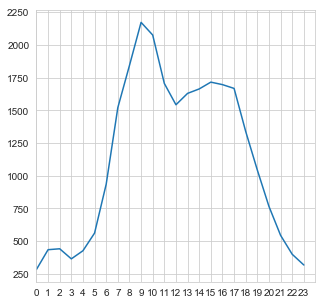

In [94]:
fig = plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = fig.gca()
print(dir(x))
ax.set_xlim(0,24)
plt.xticks(range(24))
ax.plot(x,y)

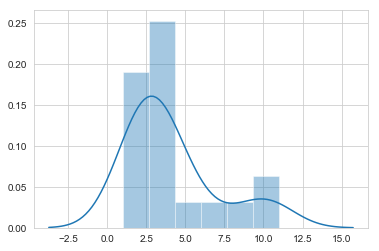

In [79]:
sns.distplot(y)

In [200]:
df_new.to_excel('loss_records.xls')